In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("df_q_noa.csv")

In [29]:
df.drop(df.columns[1], axis=1, inplace=True)

In [30]:
dfval = df.fillna(-1).values
num_row = dfval.shape[0]
top_50s = []
bottom_50s = []
market_300 = []

for date in range(2, dfval.shape[1]):

    col = dfval[:, [0,date]]
    num_nan = np.sum(col[:,1] < 0)
    sorted_x = np.array(sorted(list(col), key=lambda x: -x[1]))
    
    top_50s.append(np.array(sorted_x[:100])[:,0])
    bottom_50s.append(np.array(sorted_x[num_row-num_nan-100:num_row-num_nan])[:,0])
    market_300.append(np.array(sorted_x[:330])[:,0])

In [31]:
dates = [x[:-7] + x[-4:] for x in df.columns.values[3:]]
tops = np.array(top_50s)
bottoms = np.array(bottom_50s)
markets = np.array(market_300)

In [32]:
tops[len(dates)]

array(['ALGN US  EQUITY', 'AAPL US  EQUITY', 'ADSK US  EQUITY',
       'HRB US  EQUITY', 'CDNS US  EQUITY', 'CMG US  EQUITY',
       'EXPD US  EQUITY', 'FFIV US  EQUITY', 'HPQ US  EQUITY',
       'IDXX US  EQUITY', 'INCY US  EQUITY', 'KLAC US  EQUITY',
       'NKTR US  EQUITY', 'NTAP US  EQUITY', 'RHT US  EQUITY',
       'RHI US  EQUITY', 'TTWO US  EQUITY', 'TRIP US  EQUITY',
       'VAR US  EQUITY', 'VRSN US  EQUITY', 'WAT US  EQUITY',
       'XLNX US  EQUITY', 'EA US  EQUITY', 'CTXS US  EQUITY',
       'AOS US  EQUITY', 'VRTX US  EQUITY', 'AMD US  EQUITY',
       'SCHW US  EQUITY', 'MTD US  EQUITY', 'ULTA US  EQUITY',
       'SBUX US  EQUITY', 'PAYX US  EQUITY', 'FLIR US  EQUITY',
       'ALLE US  EQUITY', 'FL US  EQUITY', 'YUM US  EQUITY',
       'ANSS US  EQUITY', 'INTU US  EQUITY', 'AYI US  EQUITY',
       'TSCO US  EQUITY', 'LEG US  EQUITY', 'WYN US  EQUITY',
       'WU US  EQUITY', 'UAA US  EQUITY', 'UA US  EQUITY',
       'ROST US  EQUITY', 'HAS US  EQUITY', 'ROK US  EQUITY',
 

In [33]:
bottoms[len(dates)]

array(['ES US  EQUITY', 'ANTM US  EQUITY', 'FE US  EQUITY',
       'APC US  EQUITY', 'NSC US  EQUITY', 'CSX US  EQUITY',
       'DISCA US  EQUITY', 'DISCK US  EQUITY', 'ETR US  EQUITY',
       'SPG US  EQUITY', 'CSCO US  EQUITY', 'EIX US  EQUITY',
       'CCI US  EQUITY', 'DAL US  EQUITY', 'VLO US  EQUITY',
       'HPE US  EQUITY', 'OXY US  EQUITY', 'CME US  EQUITY',
       'WELL US  EQUITY', 'AAL US  EQUITY', 'SYF US  EQUITY',
       'XEL US  EQUITY', 'HCA US  EQUITY', 'PEG US  EQUITY',
       'FOXA US  EQUITY', 'FOX US  EQUITY', 'MU US  EQUITY',
       'BLK US  EQUITY', 'JCI US  EQUITY', 'PPL US  EQUITY',
       'CCL US  EQUITY', 'FDX US  EQUITY', 'V US  EQUITY',
       'PSX US  EQUITY', 'PLD US  EQUITY', 'ED US  EQUITY',
       'DHR US  EQUITY', 'PEP US  EQUITY', 'DPS US  EQUITY',
       'WMB US  EQUITY', 'BHGE US  EQUITY', 'PCG US  EQUITY',
       'MO US  EQUITY', 'ORCL US  EQUITY', 'AVGO US  EQUITY',
       'COP US  EQUITY', 'WBA US  EQUITY', 'UNP US  EQUITY',
       'BDX US  EQUI

Post Financial Crisis: 2010 - 2018

In [34]:
df_pe = pd.read_csv('spy_pe.csv')

In [35]:
df_tot_return = pd.read_csv('spy_total_return_indx.csv')
mkt_cap = pd.read_csv('spy_market_cap_more.csv')
df_pb = pd.read_csv('mod_spy_pb.csv')

In [36]:
#df_tot_return = pd.read_csv('mod_total_return.csv')

In [37]:
new_dates = mkt_cap.columns.values
mkt_cap = mkt_cap.rename(index=str, columns={x:x[:-7]+x[-4:] for x in new_dates})
df_pb = df_pb.rename(index=str, columns={x:x[:-7]+x[-4:] for x in new_dates})
df_pe = df_pe.rename(index=str, columns={x:x[:-7]+x[-4:] for x in new_dates})

In [38]:
df_tot_return = df_tot_return.rename(index=str, columns={x:x[:-7]+x[-4:] for x in new_dates})

In [39]:
df_pe = df_pe.rename(index=str, columns={x:x[:-7]+x[-4:] for x in new_dates})

In [40]:
result_top = []
result_bottom = []
result_market = []
result_topPB = []
result_bottomPB = []
result_topPE = []
result_bottomPE = []

for i in range(len(dates) - 36, len(dates)):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    result_top.append((returns * percent / percent.sum()).sum())    


In [41]:
dates[len(dates) - 36]

'3/2010'

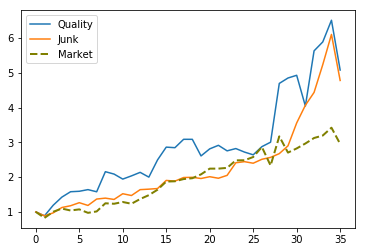

In [42]:
for i in range(len(dates) - 36, len(dates)):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    result_bottom.append((returns * percent / percent.sum()).sum())
    
for i in range(len(dates) - 36, len(dates)):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[markets[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[markets[i]][dates[i]]
    result_market.append((returns * percent / percent.sum()).sum())

for i in range(len(result_top)):
    denominator = result_top[0]
    result_top[:] = result_top[:]/denominator
    
for i in range(len(result_market)):
    denominator = result_market[0]
    result_market[:] = result_market[:]/denominator
    
for i in range(len(result_bottom)):
    denominator = result_bottom[0]
    result_bottom[:] = result_bottom[:]/denominator

plt.plot(result_top, label='Quality')
plt.plot(result_bottom, label='Junk')
plt.plot(result_market, label='Market', marker = '', color = 'olive', linewidth=2, linestyle='dashed')
plt.legend()

In [43]:
result_18 = pd.DataFrame({'Quality':result_top[:],'Market':result_market[:], 'Junk':result_bottom[:]})

In [44]:
result_18.to_csv('result_18_noa.csv')

In [45]:
for i in range(len(dates)-36, len(dates)):
    PB = df_pb.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    result_topPB.append((PB * percent / percent.sum()).sum())
    
for i in range(len(dates)-36, len(dates)):
    PB = df_pb.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    result_bottomPB.append((PB * percent / percent.sum()).sum())

KeyError: "None of [['ACN US  EQUITY' 'ALGN US  EQUITY' 'AMZN US  EQUITY' 'AAPL US  EQUITY'\n 'CDNS US  EQUITY' 'CBOE US  EQUITY' 'DFS US  EQUITY' 'FFIV US  EQUITY'\n 'HUM US  EQUITY' 'INCY US  EQUITY' 'LYB US  EQUITY' 'MCO US  EQUITY'\n 'NKTR US  EQUITY' 'NTAP US  EQUITY' 'NFLX US  EQUITY' 'RHT US  EQUITY'\n 'REGN US  EQUITY' 'CRM US  EQUITY' 'UAA US  EQUITY' 'UA US  EQUITY'\n 'VRSN US  EQUITY' 'VRTX US  EQUITY' 'MNST US  EQUITY' 'ULTA US  EQUITY'\n 'IPGP US  EQUITY' 'TRIP US  EQUITY' 'IT US  EQUITY' 'ADSK US  EQUITY'\n 'GPN US  EQUITY' 'CMG US  EQUITY' 'ILMN US  EQUITY' 'MA US  EQUITY'\n 'VRSK US  EQUITY' 'CNC US  EQUITY' 'IDXX US  EQUITY' 'RHI US  EQUITY'\n 'TTWO US  EQUITY' 'ALXN US  EQUITY' 'TSCO US  EQUITY' 'EXPD US  EQUITY'\n 'ROST US  EQUITY' 'CHRW US  EQUITY' 'CF US  EQUITY' 'SCHW US  EQUITY'\n 'BKNG US  EQUITY' 'MCHP US  EQUITY' 'VAR US  EQUITY' 'HRB US  EQUITY'\n 'TPR US  EQUITY' 'XLNX US  EQUITY' 'NVDA US  EQUITY' 'EA US  EQUITY'\n 'FLR US  EQUITY' 'FLIR US  EQUITY' 'FB US  EQUITY' 'WAT US  EQUITY'\n 'SWKS US  EQUITY' 'AYI US  EQUITY' 'AKAM US  EQUITY' 'SNPS US  EQUITY'\n 'EVHC US  EQUITY' 'EW US  EQUITY' 'MTD US  EQUITY' 'RMD US  EQUITY'\n 'GRMN US  EQUITY' 'TSS US  EQUITY' 'AOS US  EQUITY' 'ISRG US  EQUITY'\n 'LRCX US  EQUITY' 'FAST US  EQUITY' 'FTI US  EQUITY' 'ADI US  EQUITY'\n 'DLTR US  EQUITY' 'PAYX US  EQUITY' 'AVGO US  EQUITY' 'PVH US  EQUITY'\n 'ANSS US  EQUITY' 'JBHT US  EQUITY' 'CERN US  EQUITY' 'AJG US  EQUITY'\n 'CTSH US  EQUITY' 'PKG US  EQUITY' 'AAP US  EQUITY' 'CELG US  EQUITY'\n 'KLAC US  EQUITY' 'ALK US  EQUITY' 'ROK US  EQUITY' 'PRGO US  EQUITY'\n 'CTXS US  EQUITY' 'LKQ US  EQUITY' 'FL US  EQUITY' 'SNA US  EQUITY'\n 'FMC US  EQUITY' 'IFF US  EQUITY' 'FLS US  EQUITY' 'WU US  EQUITY'\n 'ALB US  EQUITY' 'COL US  EQUITY' 'JEC US  EQUITY' 'SRCL US  EQUITY']] are in the [index]"

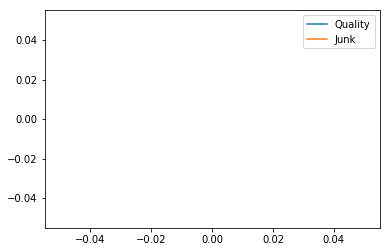

In [46]:
plt.plot(result_topPB, label='Quality')
plt.plot(result_bottomPB, label='Junk')
plt.legend()

In [47]:
for i in range(len(dates)-36, len(dates)):
    PE = df_pe.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    result_topPE.append((PE).sum())
    
for i in range(len(dates)-36, len(dates)):
    PE = df_pb.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    result_bottomPE.append((PE).sum())

KeyError: "None of [['MO US  EQUITY' 'WM US  EQUITY' 'MMM US  EQUITY' 'FCX US  EQUITY'\n 'RSG US  EQUITY' 'CHTR US  EQUITY' 'DTE US  EQUITY' 'EQR US  EQUITY'\n 'FDX US  EQUITY' 'CSCO US  EQUITY' 'UPS US  EQUITY' 'VIAB US  EQUITY'\n 'JCI US  EQUITY' 'CBS US  EQUITY' 'WMB US  EQUITY' 'AEE US  EQUITY'\n 'RCL US  EQUITY' 'TMO US  EQUITY' 'CSX US  EQUITY' 'MGM US  EQUITY'\n 'XEL US  EQUITY' 'NSC US  EQUITY' 'HES US  EQUITY' 'CTL US  EQUITY'\n 'PEG US  EQUITY' 'BSX US  EQUITY' 'HCA US  EQUITY' 'SRE US  EQUITY'\n 'VNO US  EQUITY' 'APA US  EQUITY' 'V US  EQUITY' 'ETR US  EQUITY'\n 'MDT US  EQUITY' 'AMGN US  EQUITY' 'PM US  EQUITY' 'SLB US  EQUITY'\n 'ADM US  EQUITY' 'SPG US  EQUITY' 'EIX US  EQUITY' 'ED US  EQUITY'\n 'PEP US  EQUITY' 'VLO US  EQUITY' 'CME US  EQUITY' 'ORCL US  EQUITY'\n 'GM US  EQUITY' 'DVN US  EQUITY' 'KMI US  EQUITY' 'FE US  EQUITY'\n 'MCD US  EQUITY' 'PCG US  EQUITY' 'LOW US  EQUITY' 'UNH US  EQUITY'\n 'EXC US  EQUITY' 'DE US  EQUITY' 'UNP US  EQUITY' 'AES US  EQUITY'\n 'GGP US  EQUITY' 'BLK US  EQUITY' 'UTX US  EQUITY' 'HD US  EQUITY'\n 'KO US  EQUITY' 'MRO US  EQUITY' 'INTC US  EQUITY' 'D US  EQUITY'\n 'APC US  EQUITY' 'ABT US  EQUITY' 'AEP US  EQUITY' 'OXY US  EQUITY'\n 'NEE US  EQUITY' 'CCL US  EQUITY' 'TGT US  EQUITY' 'IBM US  EQUITY'\n 'FOXA US  EQUITY' 'FOX US  EQUITY' 'SO US  EQUITY' 'CAT US  EQUITY'\n 'DUK US  EQUITY' 'COF US  EQUITY' 'AXP US  EQUITY' 'T US  EQUITY'\n 'CVX US  EQUITY' 'C US  EQUITY' 'CMCSA US  EQUITY' 'COP US  EQUITY'\n 'CVS US  EQUITY' 'XOM US  EQUITY' 'F US  EQUITY' 'GE US  EQUITY'\n 'GS US  EQUITY' 'HPQ US  EQUITY' 'JNJ US  EQUITY' 'MRK US  EQUITY'\n 'MDLZ US  EQUITY' 'MS US  EQUITY' 'PFE US  EQUITY' 'PG US  EQUITY'\n 'DIS US  EQUITY' 'TWX US  EQUITY' 'VZ US  EQUITY' 'WMT US  EQUITY']] are in the [index]"

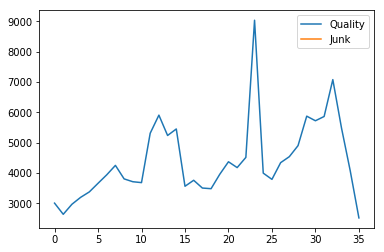

In [48]:
plt.plot(result_topPE, label='Quality')
plt.plot(result_bottomPE, label='Junk')
plt.legend()

2003-2009

In [49]:
dates[len(dates) - 36]
dates[len(dates) - 64]

'3/2003'

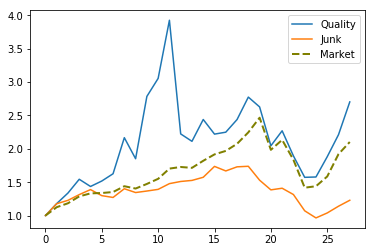

In [50]:
result_top = []
result_bottom = []
result_market = []
result_topPB = []
result_bottomPB = []

for i in range(len(dates) - 64, len(dates) - 36):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    result_top.append((returns * percent / percent.sum()).sum())    

for i in range(len(dates) - 64, len(dates) - 36):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    result_bottom.append((returns * percent / percent.sum()).sum())
    
for i in range(len(dates) - 64, len(dates) - 36):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[markets[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[markets[i]][dates[i]]
    result_market.append((returns * percent / percent.sum()).sum())

for i in range(len(result_top)):
    denominator = result_top[0]
    result_top[:] = result_top[:]/denominator
    
for i in range(len(result_market)):
    denominator = result_market[0]
    result_market[:] = result_market[:]/denominator
    
for i in range(len(result_bottom)):
    denominator = result_bottom[0]
    result_bottom[:] = result_bottom[:]/denominator
    
plt.plot(result_top, label='Quality')
plt.plot(result_bottom, label='Junk')
plt.plot(result_market, label='Market', marker = '', color = 'olive', linewidth=2, linestyle='dashed')
plt.legend()

In [51]:
result_09 = pd.DataFrame({'Quality':result_top[:],'Market':result_market[:], 'Junk':result_bottom[:]})
result_09.to_csv('result_09_noa.csv')

In [22]:
for i in range(len(dates) - 64, len(dates) - 36):
    PB = df_pb.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    result_topPB.append((PB * percent / percent.sum()).sum())
    
for i in range(len(dates) - 64, len(dates) - 36):
    PB = df_pb.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    result_bottomPB.append((PB * percent / percent.sum()).sum())
    
plt.plot(result_topPB, label='top')
plt.plot(result_bottomPB, label='bottom')
plt.legend()

KeyError: "None of [['ACN US  EQUITY' 'AET US  EQUITY' 'AMG US  EQUITY' 'AKAM US  EQUITY'\n 'ALXN US  EQUITY' 'ALGN US  EQUITY' 'AMZN US  EQUITY' 'ANSS US  EQUITY'\n 'AON US  EQUITY' 'BKNG US  EQUITY' 'CELG US  EQUITY' 'CNC US  EQUITY'\n 'CME US  EQUITY' 'CTSH US  EQUITY' 'FFIV US  EQUITY' 'ISRG US  EQUITY'\n 'MNST US  EQUITY' 'MCO US  EQUITY' 'NFLX US  EQUITY' 'WDC US  EQUITY'\n 'ILMN US  EQUITY' 'INCY US  EQUITY' 'ADBE US  EQUITY' 'VRTX US  EQUITY'\n 'AAPL US  EQUITY' 'REGN US  EQUITY' 'HOLX US  EQUITY' 'FLIR US  EQUITY'\n 'ORCL US  EQUITY' 'FLR US  EQUITY' 'IT US  EQUITY' 'HUM US  EQUITY'\n 'IDXX US  EQUITY' 'GILD US  EQUITY' 'TPR US  EQUITY' 'NKTR US  EQUITY'\n 'RMD US  EQUITY' 'TTWO US  EQUITY' 'CHRW US  EQUITY' 'EVHC US  EQUITY'\n 'RHT US  EQUITY' 'NDAQ US  EQUITY' 'TSCO US  EQUITY' 'NVDA US  EQUITY'\n 'EXPD US  EQUITY' 'GPN US  EQUITY' 'VAR US  EQUITY' 'ADSK US  EQUITY'\n 'GRMN US  EQUITY' 'PRGO US  EQUITY' 'BLK US  EQUITY' 'EQIX US  EQUITY'\n 'FIS US  EQUITY' 'NTAP US  EQUITY' 'WAT US  EQUITY' 'RHI US  EQUITY'\n 'FAST US  EQUITY' 'LRCX US  EQUITY' 'CERN US  EQUITY' 'XEC US  EQUITY'\n 'COO US  EQUITY' 'PVH US  EQUITY' 'TSS US  EQUITY' 'ZBH US  EQUITY'\n 'FTI US  EQUITY' 'AJG US  EQUITY' 'ROST US  EQUITY' 'PAYX US  EQUITY'\n 'EA US  EQUITY' 'RRC US  EQUITY' 'DLTR US  EQUITY' 'SRCL US  EQUITY'\n 'KMX US  EQUITY' 'CHD US  EQUITY' 'VTR US  EQUITY' 'ROP US  EQUITY'\n 'COG US  EQUITY' 'ALB US  EQUITY' 'SNPS US  EQUITY' 'CTXS US  EQUITY'\n 'AOS US  EQUITY' 'ANTM US  EQUITY' 'JEC US  EQUITY' 'STX US  EQUITY'\n 'EW US  EQUITY' 'MYL US  EQUITY' 'SYMC US  EQUITY' 'MTD US  EQUITY'\n 'AME US  EQUITY' 'APH US  EQUITY' 'ADS US  EQUITY' 'ORLY US  EQUITY'\n 'WRK US  EQUITY' 'JBHT US  EQUITY' 'HSIC US  EQUITY' 'ALK US  EQUITY'\n 'AYI US  EQUITY' 'MCHP US  EQUITY' 'HP US  EQUITY' 'PWR US  EQUITY']] are in the [index]"

2000 - 2002

In [23]:
dates[len(dates)-76]

'3/2000'

In [24]:
tops.shape

(94, 100)

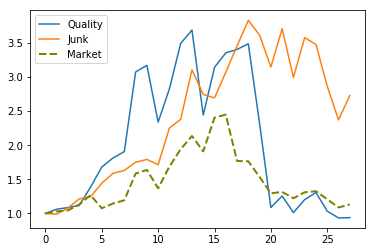

In [25]:
result_top = []
result_bottom = []
result_market = []
result_topPB = []
result_bottomPB = []

for i in range(len(dates)-92, len(dates)-64):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = percent.astype(float)
    result_top.append((returns * percent / percent.sum()).sum())

for i in range(len(dates)-92, len(dates)-64):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    percent = percent.astype(float)
    result_bottom.append((returns * percent / percent.sum()).sum())
    
for i in range(len(dates)-92, len(dates)-64):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[markets[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[markets[i]][dates[i]]
    percent = percent.astype(float)
    result_market.append((returns * percent / percent.sum()).sum())

for i in range(len(result_top)):
    denominator = result_top[0]
    result_top[:] = result_top[:]/denominator
    
for i in range(len(result_market)):
    denominator = result_market[0]
    result_market[:] = result_market[:]/denominator
    
for i in range(len(result_bottom)):
    denominator = result_bottom[0]
    result_bottom[:] = result_bottom[:]/denominator
    
plt.plot(result_top, label='Quality')
plt.plot(result_bottom, label='Junk')
plt.plot(result_market, label='Market', marker = '', color = 'olive', linewidth=2, linestyle='dashed')
plt.legend()

In [26]:
result_00 = pd.DataFrame({'top':result_top[:],'market':result_market[:], 'bottom':result_bottom[:]})
result_00.to_csv('result_00.csv')

Specific attribution